# Import library

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
import pickle
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
!pip3 install catboost
from catboost import CatBoostRegressor, CatBoostClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Dataset

In [ ]:
columns_describe = pd.read_csv('/content/drive/MyDrive/Quản lý chung/HK6/Kiến tập/Kiến tập - Data/2. Dataset/HomeCredit/HomeCredit_columns_description.csv',encoding='latin1')
columns_describe

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


## the four dataset

In [ ]:
pos_cash = pd.read_csv('/content/drive/MyDrive/Quản lý chung/HK6/Kiến tập/Kiến tập - Data/2. Dataset/HomeCredit/POS_CASH_balance.csv')
pos_cash.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


In [ ]:
credit_card_balance = pd.read_csv('/content/drive/MyDrive/Quản lý chung/HK6/Kiến tập/Kiến tập - Data/2. Dataset/HomeCredit/credit_card_balance.csv')
credit_card_balance.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


In [ ]:
installments_payments = pd.read_csv('/content/drive/MyDrive/Quản lý chung/HK6/Kiến tập/Kiến tập - Data/2. Dataset/HomeCredit/installments_payments.csv')
installments_payments.head(3)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


In [ ]:
previous_application = pd.read_csv('/content/drive/MyDrive/Quản lý chung/HK6/Kiến tập/Kiến tập - Data/2. Dataset/HomeCredit/previous_application.csv')
previous_application.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


## column name

In [ ]:
pos_cash.columns.to_numpy()

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

In [ ]:
credit_card_balance.columns.to_numpy()

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

In [ ]:
installments_payments.columns.to_numpy()

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

In [ ]:
previous_application.columns.to_numpy()

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [ ]:
pos_cash_columns = set(pos_cash.columns)
credit_balance_columns = set(credit_card_balance.columns)
installments_payments_columns = set(installments_payments.columns)
previous_application_columns = set(previous_application.columns)

### The final column

In [ ]:
all_columns = pos_cash_columns.union(credit_balance_columns, installments_payments_columns, previous_application_columns)

all_columns.add("TARGET")

column_array = list(all_columns)
column_array

['RATE_INTEREST_PRIMARY',
 'NAME_YIELD_GROUP',
 'DAYS_LAST_DUE',
 'MONTHS_BALANCE',
 'CNT_PAYMENT',
 'AMT_DRAWINGS_CURRENT',
 'DAYS_INSTALMENT',
 'AMT_RECIVABLE',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_APPLICATION',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'NAME_CASH_LOAN_PURPOSE',
 'RATE_INTEREST_PRIVILEGED',
 'AMT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_ATM_CURRENT',
 'DAYS_FIRST_DRAWING',
 'AMT_CREDIT',
 'CNT_INSTALMENT_FUTURE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'NUM_INSTALMENT_VERSION',
 'DAYS_TERMINATION',
 'AMT_TOTAL_RECEIVABLE',
 'DAYS_ENTRY_PAYMENT',
 'AMT_INSTALMENT',
 'WEEKDAY_APPR_PROCESS_START',
 'SK_ID_CURR',
 'CNT_INSTALMENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'DAYS_DECISION',
 'CNT_INSTALMENT_MATURE_CUM',
 'TARGET',
 'SK_ID_PREV',
 'AMT_ANNUITY',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE',
 'AMT_PAYMENT_CURRENT',
 'SK_DPD_DEF',
 'NUM_INSTALMENT_NUMBER',
 'NFLAG_LAST_APPL_IN_DAY',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'NAME_CONTRACT_TYPE',
 'CODE_REJECT_REASON',
 'NAME

In [ ]:
column_count = len(column_array)

In [ ]:
column_count

66

## train, test dataset

In [ ]:
train_dataset = pd.read_csv('/content/drive/MyDrive/Quản lý chung/HK6/Kiến tập/application_train.csv')
train_dataset.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_dataset = pd.read_csv('/content/drive/MyDrive/Quản lý chung/HK6/Kiến tập/application_test.csv')
test_dataset.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [ ]:
train_dataset.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [ ]:
train_dataset['SK_ID_CURR']

0         100002
1         100003
2         100004
3         100006
4         100007
           ...  
307506    456251
307507    456252
307508    456253
307509    456254
307510    456255
Name: SK_ID_CURR, Length: 307511, dtype: int64

# Dataset Preparation

https://www.kaggle.com/code/shivamb/homecreditrisk-extensive-eda-baseline-0-772/notebook

## Initialize data

## Concatenate applications train - test data

In [ ]:
test_dataset['is_test'] = 1
test_dataset['is_train'] = 0
train_dataset['is_test'] = 0
train_dataset['is_train'] = 1

# target variable
Y = train_dataset['TARGET']
train_X = train_dataset.drop(['TARGET'], axis = 1)

# test ID
test_id = test_dataset['SK_ID_CURR']
test_X = test_dataset


In [ ]:
id_train_test = ['SK_ID_CURR','is_test','is_train']

In [ ]:
demo_var = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','OCCUPATION_TYPE','ORGANIZATION_TYPE','FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','CNT_FAM_MEMBERS']

In [ ]:
application_var = id_train_test + demo_var

In [ ]:
application_var

['SK_ID_CURR',
 'is_test',
 'is_train',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE',
 'HOUSETYPE_MODE',
 'CNT_FAM_MEMBERS']

In [ ]:
# merge train and test datasets for preprocessing
data_test_train = pd.concat([train_X, test_X], axis=0)
data = data_test_train[application_var].copy()

In [ ]:
numeric_var = []

## Feature Engineering

### .1/Feature Engineering - Applications Demographics

In [ ]:
income_ranges = [0, 20000, 50000, 100000, float('inf')]
income_categories = ['<20k', '20k-50k', '50k-100k', '>100k']

# Convert the 'AMT_INCOME_TOTAL' column to categorical values
data['AMT_INCOME_TOTAL'] = pd.cut(data['AMT_INCOME_TOTAL'], bins=income_ranges, labels=income_categories, right=False).astype('object')


https://digitalcommons.uri.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1021&context=hdf_facpubs

In [ ]:
age_bins = [float('-inf'), 25*365, 35*365, 55*365, 65*365, float('inf')]
age_labels = ['18-24', '25-34', '35-54', '55-64', '65+']

data['DAYS_BIRTH'] = pd.cut(abs(data['DAYS_BIRTH']), bins=age_bins, labels=age_labels, right=False)

### .2/Feature Engineering - Previous Applications

In [ ]:
## More Feature Ideas Reference : https://www.kaggle.com/ogrellier/good-fun-with-ligthgbm

## count the number of previous applications for a given ID
prev_apps_count = previous_application[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
previous_application['SK_ID_PREV'] = previous_application['SK_ID_CURR'].map(prev_apps_count['SK_ID_PREV'])

## Average values for all other features in previous applications
prev_apps_avg = previous_application.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['prev_' + col for col in prev_apps_avg.columns]
numeric_var.append(prev_apps_avg.columns.tolist())
data = data.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')
data

<ipython-input-28-f03b852378e8>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prev_apps_avg = previous_application.groupby('SK_ID_CURR').mean()


,SK_ID_CURR,is_test,is_train,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,...,prev_RATE_INTEREST_PRIVILEGED,prev_DAYS_DECISION,prev_SELLERPLACE_AREA,prev_CNT_PAYMENT,prev_DAYS_FIRST_DRAWING,prev_DAYS_FIRST_DUE,prev_DAYS_LAST_DUE_1ST_VERSION,prev_DAYS_LAST_DUE,prev_DAYS_TERMINATION,prev_NFLAG_INSURED_ON_APPROVAL
0,100002,0,1,Cash loans,M,N,Y,0,>100k,Unaccompanied,...,NaN,-606.000000,500.000000,24.000000,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,100003,0,1,Cash loans,F,N,N,0,>100k,Family,...,NaN,-1305.000000,533.000000,10.000000,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
2,100004,0,1,Revolving loans,M,Y,Y,0,50k-100k,Unaccompanied,...,NaN,-815.000000,30.000000,4.000000,365243.0,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
3,100006,0,1,Cash loans,F,N,Y,0,>100k,Unaccompanied,...,NaN,-272.444444,894.222222,23.000000,365243.0,91066.500000,91584.000000,182477.500000,182481.750000,0.000000
4,100007,0,1,Cash loans,M,N,Y,0,>100k,Unaccompanied,...,NaN,-1222.833333,409.166667,20.666667,365243.0,-1263.200000,-837.200000,72136.200000,72143.800000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,1,0,Cash loans,F,N,Y,0,>100k,Unaccompanied,...,NaN,-683.000000,-1.000000,24.000000,365243.0,-653.000000,37.000000,-593.000000,-591.000000,1.000000
356251,456222,1,0,Cash loans,F,N,N,2,>100k,Unaccompanied,...,NaN,-1552.500000,99.000000,17.500000,365243.0,-1519.750000,-1024.750000,-1024.750000,-1019.500000,0.500000
356252,456223,1,0,Cash loans,F,Y,Y,1,>100k,Unaccompanied,...,NaN,-461.000000,146.000000,11.000000,365243.0,-423.500000,-123.500000,182293.500000,182307.500000,0.000000
356253,456224,1,0,Cash loans,M,N,N,0,>100k,Family,...,NaN,-1283.600000,22.600000,14.500000,365243.0,-1409.000000,-929.000000,181620.500000,181622.500000,0.000000


### .3/Feature Engineering - Previous Installments

In [ ]:
## count the number of previous installments
cnt_inst = installments_payments[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
installments_payments['SK_ID_PREV'] = installments_payments['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])

## Average values for all other variables in installments payments
avg_inst = installments_payments.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['i_' + f_ for f_ in avg_inst.columns]
numeric_var.append(avg_inst.columns.tolist())
data = data.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')

### .4/Feature Engineering - Pos Cash Balance

In [ ]:
### count the number of pos cash for a given ID
pcb_count = pos_cash[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pos_cash['SK_ID_PREV'] = pos_cash['SK_ID_CURR'].map(pcb_count['SK_ID_PREV'])

## Average Values for all other variables in pos cash
pcb_avg = pos_cash.groupby('SK_ID_CURR').mean()
pcb_avg.columns = ['pcb_' + f_ for f_ in pcb_avg.columns]
numeric_var.append(pcb_avg.columns.tolist())
data = data.merge(right=pcb_avg.reset_index(), how='left', on='SK_ID_CURR')

<ipython-input-30-39d879ce0cea>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pcb_avg = pos_cash.groupby('SK_ID_CURR').mean()


### .5/Feature Engineering - Credit Card Balance

In [ ]:
### count the number of previous applications for a given ID
nb_prevs = credit_card_balance[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
credit_card_balance['SK_ID_PREV'] = credit_card_balance['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])

### average of all other columns
avg_cc_bal = credit_card_balance.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['cc_bal_' + f_ for f_ in avg_cc_bal.columns]
data = data.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')

<ipython-input-31-7ff529e61746>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_cc_bal = credit_card_balance.groupby('SK_ID_CURR').mean()


## Data cleaning

In [ ]:
data_null = data.isnull().sum()

In [ ]:
print(data.duplicated().sum())

0


## Final dataset

In [ ]:
data.head(3)

,SK_ID_CURR,is_test,is_train,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,...,cc_bal_AMT_RECEIVABLE_PRINCIPAL,cc_bal_AMT_RECIVABLE,cc_bal_AMT_TOTAL_RECEIVABLE,cc_bal_CNT_DRAWINGS_ATM_CURRENT,cc_bal_CNT_DRAWINGS_CURRENT,cc_bal_CNT_DRAWINGS_OTHER_CURRENT,cc_bal_CNT_DRAWINGS_POS_CURRENT,cc_bal_CNT_INSTALMENT_MATURE_CUM,cc_bal_SK_DPD,cc_bal_SK_DPD_DEF
0,100002,0,1,Cash loans,M,N,Y,0,>100k,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,1,Cash loans,F,N,N,0,>100k,Family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,1,Revolving loans,M,Y,Y,0,50k-100k,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(356255, 75)

# Pre-processing

## Data transformation

In [ ]:
data_scaling = data.copy()

### Data transformation

In [ ]:
demo_numeric_columns = data[demo_var].select_dtypes(include=[np.number]).columns
demo_numeric_columns

Index(['CNT_CHILDREN', 'CNT_FAM_MEMBERS'], dtype='object')

In [ ]:
demo_num_and_numeric_var = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']+numeric_var

In [ ]:
def flatten_list(nested_list):
    flattened = []
    for item in nested_list:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened
demo_num_and_numeric_var_final = flatten_list(demo_num_and_numeric_var)
demo_num_and_numeric_var_final

['CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'prev_SK_ID_PREV',
 'prev_AMT_ANNUITY',
 'prev_AMT_APPLICATION',
 'prev_AMT_CREDIT',
 'prev_AMT_DOWN_PAYMENT',
 'prev_AMT_GOODS_PRICE',
 'prev_HOUR_APPR_PROCESS_START',
 'prev_NFLAG_LAST_APPL_IN_DAY',
 'prev_RATE_DOWN_PAYMENT',
 'prev_RATE_INTEREST_PRIMARY',
 'prev_RATE_INTEREST_PRIVILEGED',
 'prev_DAYS_DECISION',
 'prev_SELLERPLACE_AREA',
 'prev_CNT_PAYMENT',
 'prev_DAYS_FIRST_DRAWING',
 'prev_DAYS_FIRST_DUE',
 'prev_DAYS_LAST_DUE_1ST_VERSION',
 'prev_DAYS_LAST_DUE',
 'prev_DAYS_TERMINATION',
 'prev_NFLAG_INSURED_ON_APPROVAL',
 'i_SK_ID_PREV',
 'i_NUM_INSTALMENT_VERSION',
 'i_NUM_INSTALMENT_NUMBER',
 'i_DAYS_INSTALMENT',
 'i_DAYS_ENTRY_PAYMENT',
 'i_AMT_INSTALMENT',
 'i_AMT_PAYMENT',
 'pcb_SK_ID_PREV',
 'pcb_MONTHS_BALANCE',
 'pcb_CNT_INSTALMENT',
 'pcb_CNT_INSTALMENT_FUTURE',
 'pcb_SK_DPD',
 'pcb_SK_DPD_DEF']

In [ ]:
data[demo_num_and_numeric_var_final] = data[demo_num_and_numeric_var_final].apply(pd.to_numeric, errors='ignore')
data[demo_num_and_numeric_var_final] = data[demo_num_and_numeric_var_final].fillna(0)

In [ ]:
# Create an empty dataframe
skewness_df = pd.DataFrame(columns=['featureName', 'originSkew', 'logSkew', 'sqrtSkew','cbrtSkew'])

demo_num_and_numeric_var = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']+numeric_var
# def log_sqrt_skewness(feature, frame):
#     if frame[feature].notnull().all():
#         origin_skew = frame[feature].skew().round(2)
#         log_skew = np.log(frame[feature]).skew().round(2)
#         sqrt_skew = np.sqrt(frame[feature]).skew().round(2)
#     else:
#         origin_skew = np.zeros
#         log_skew = np.zeros
#         sqrt_skew = np.zeros
def log_sqrt_skewness(feature, frame):
    frame[feature] = frame[feature].astype(float)
    origin_skew = frame[feature].skew().round(2)
    log_skew = np.log(frame[feature]).skew().round(2)
    sqrt_skew = np.sqrt(frame[feature]).skew()
    cbrt_skew = np.cbrt(frame[feature]).skew().round(2)
    # Append the results to the dataframe
    global skewness_df
    skewness_df = skewness_df.append({'featureName': feature, 'originSkew': origin_skew,
                                      'logSkew': log_skew, 'sqrtSkew': sqrt_skew,'cbrtSkew': cbrt_skew}, ignore_index=True)


# Call the function for each feature
for feat in (demo_num_and_numeric_var_final):
    log_sqrt_skewness(feat, data)

skewness_df

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-57-152391202c7b>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewness_df = skewness_df.append({'featureName': feature, 'originSkew': origin_skew,
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-57-152391202c7b>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewness_df = skewness_df.append({'featureName': feature, 'originSkew': origin_skew,
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufu

,featureName,originSkew,logSkew,sqrtSkew,cbrtSkew
0,CNT_CHILDREN,2.03,NaN,1.088983,0.97
1,CNT_FAM_MEMBERS,1.01,NaN,0.330251,0.14
2,prev_SK_ID_PREV,2.23,NaN,0.415293,-0.53
3,prev_AMT_ANNUITY,2.36,NaN,0.033142,-1.16
4,prev_AMT_APPLICATION,3.48,NaN,0.801005,-0.31
5,prev_AMT_CREDIT,3.20,NaN,0.740411,-0.31
6,prev_AMT_DOWN_PAYMENT,30.85,NaN,1.983099,0.46
7,prev_AMT_GOODS_PRICE,2.88,NaN,0.765079,-0.26
8,prev_HOUR_APPR_PROCESS_START,-1.33,NaN,-2.863790,-3.47
9,prev_NFLAG_LAST_APPL_IN_DAY,-4.12,NaN,-4.161525,-4.17


In [ ]:
sqrt_var = []
cbrt_var = []
origin_var = []
log_var = []

# Iterate over each row in the DataFrame
for index, row in skewness_df.iterrows():
    feature = row['featureName']
    origin_skew = row['originSkew']
    log_skew = row['logSkew']
    sqrt_skew = row['sqrtSkew']
    cbrt_skew = row['cbrtSkew']

    # Compare the skewness values and update the corresponding array
    min_skewness = min(abs(origin_skew), abs(log_skew), abs(sqrt_skew), abs(cbrt_skew))

    # Append the variable to the corresponding array
    if min_skewness == abs(sqrt_skew):
        sqrt_var.append(feature)
    elif min_skewness == abs(cbrt_skew):
        cbrt_var.append(feature)
    elif min_skewness == abs(log_skew):
        log_var.append(feature)
    else:
        origin_var.append(feature)

# Print the resulting arrays
print("Square Root Transformed Variables:", sqrt_var)
print("Cube Root Transformed Variables:", cbrt_var)
print("Log Transformed Variables:", log_var)
print("Original Variables:", origin_var)

Square Root Transformed Variables: ['prev_SK_ID_PREV', 'prev_AMT_ANNUITY', 'prev_DAYS_DECISION', 'prev_CNT_PAYMENT', 'prev_DAYS_FIRST_DUE', 'prev_DAYS_LAST_DUE_1ST_VERSION', 'i_NUM_INSTALMENT_VERSION', 'i_DAYS_INSTALMENT', 'i_DAYS_ENTRY_PAYMENT', 'pcb_SK_ID_PREV', 'pcb_MONTHS_BALANCE', 'pcb_CNT_INSTALMENT', 'pcb_CNT_INSTALMENT_FUTURE']
Cube Root Transformed Variables: ['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'prev_AMT_APPLICATION', 'prev_AMT_CREDIT', 'prev_AMT_DOWN_PAYMENT', 'prev_AMT_GOODS_PRICE', 'prev_RATE_DOWN_PAYMENT', 'prev_RATE_INTEREST_PRIMARY', 'prev_RATE_INTEREST_PRIVILEGED', 'prev_SELLERPLACE_AREA', 'prev_DAYS_LAST_DUE', 'prev_DAYS_TERMINATION', 'prev_NFLAG_INSURED_ON_APPROVAL', 'i_SK_ID_PREV', 'i_NUM_INSTALMENT_NUMBER', 'i_AMT_INSTALMENT', 'i_AMT_PAYMENT', 'pcb_SK_DPD', 'pcb_SK_DPD_DEF']
Log Transformed Variables: []
Original Variables: ['prev_HOUR_APPR_PROCESS_START', 'prev_NFLAG_LAST_APPL_IN_DAY', 'prev_DAYS_FIRST_DRAWING']


In [ ]:
for i in sqrt_var:
  data_scaling[i] = np.sqrt(data_scaling[i])
for i in cbrt_var:
  data_scaling[i] = np.cbrt(data_scaling[i])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
data_scaling

,SK_ID_CURR,is_test,is_train,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,...,cc_bal_AMT_RECEIVABLE_PRINCIPAL,cc_bal_AMT_RECIVABLE,cc_bal_AMT_TOTAL_RECEIVABLE,cc_bal_CNT_DRAWINGS_ATM_CURRENT,cc_bal_CNT_DRAWINGS_CURRENT,cc_bal_CNT_DRAWINGS_OTHER_CURRENT,cc_bal_CNT_DRAWINGS_POS_CURRENT,cc_bal_CNT_INSTALMENT_MATURE_CUM,cc_bal_SK_DPD,cc_bal_SK_DPD_DEF
0,100002,0,1,Cash loans,M,N,Y,0.000000,>100k,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,1,Cash loans,F,N,N,0.000000,>100k,Family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,1,Revolving loans,M,Y,Y,0.000000,50k-100k,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,1,Cash loans,F,N,Y,0.000000,>100k,Unaccompanied,...,0.00000,0.00000,0.00000,NaN,0.000000,NaN,NaN,0.000000,0.0,0.0
4,100007,0,1,Cash loans,M,N,Y,0.000000,>100k,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,1,0,Cash loans,F,N,Y,0.000000,>100k,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356251,456222,1,0,Cash loans,F,N,N,1.259921,>100k,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356252,456223,1,0,Cash loans,F,Y,Y,1.000000,>100k,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356253,456224,1,0,Cash loans,M,N,N,0.000000,>100k,Family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Standard Scaling

In [ ]:
for feat in demo_num_and_numeric_var_final:
  data_scaling[feat] = StandardScaler().fit_transform(np.array(data_scaling[feat]).reshape(-1, 1))
# for feat in num_var:
#   distplot(feat, data_scaling, color='c')
#   print("Skewness of feature", feat, ":", data_scaling[feat].skew().round(2))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encount

In [ ]:
data_scaling

,SK_ID_CURR,is_test,is_train,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,...,cc_bal_AMT_RECEIVABLE_PRINCIPAL,cc_bal_AMT_RECIVABLE,cc_bal_AMT_TOTAL_RECEIVABLE,cc_bal_CNT_DRAWINGS_ATM_CURRENT,cc_bal_CNT_DRAWINGS_CURRENT,cc_bal_CNT_DRAWINGS_OTHER_CURRENT,cc_bal_CNT_DRAWINGS_POS_CURRENT,cc_bal_CNT_INSTALMENT_MATURE_CUM,cc_bal_SK_DPD,cc_bal_SK_DPD_DEF
0,100002,0,1,Cash loans,M,N,Y,-0.643899,>100k,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,1,Cash loans,F,N,N,-0.643899,>100k,Family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,1,Revolving loans,M,Y,Y,-0.643899,50k-100k,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,1,Cash loans,F,N,Y,-0.643899,>100k,Unaccompanied,...,0.00000,0.00000,0.00000,NaN,0.000000,NaN,NaN,0.000000,0.0,0.0
4,100007,0,1,Cash loans,M,N,Y,-0.643899,>100k,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,1,0,Cash loans,F,N,Y,-0.643899,>100k,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356251,456222,1,0,Cash loans,F,N,N,1.837792,>100k,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356252,456223,1,0,Cash loans,F,Y,Y,1.325821,>100k,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356253,456224,1,0,Cash loans,M,N,N,-0.643899,>100k,Family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Handelling Categorical Features

In [ ]:
demo_numeric_columns

Index(['CNT_CHILDREN', 'CNT_FAM_MEMBERS'], dtype='object')

In [ ]:
onehot_var = list(set(demo_var)- set(demo_numeric_columns))
onehot_var

['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'DAYS_BIRTH',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE',
 'WALLSMATERIAL_MODE',
 'NAME_HOUSING_TYPE',
 'HOUSETYPE_MODE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'FLAG_OWN_CAR',
 'AMT_INCOME_TOTAL',
 'NAME_EDUCATION_TYPE',
 'FONDKAPREMONT_MODE']

In [ ]:
filtered_onehot_var = [var for var in onehot_var if data_scaling[var].nunique() > 2]
filtered_onehot_var

['CODE_GENDER',
 'DAYS_BIRTH',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'ORGANIZATION_TYPE',
 'WALLSMATERIAL_MODE',
 'NAME_HOUSING_TYPE',
 'HOUSETYPE_MODE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'AMT_INCOME_TOTAL',
 'NAME_EDUCATION_TYPE',
 'FONDKAPREMONT_MODE']

In [ ]:
filtered_label_var = list(set(onehot_var)- set(filtered_onehot_var))
filtered_label_var

['FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY']

In [ ]:
data_scaling['DAYS_BIRTH'].value_counts()

35-54    179131
25-34     83552
55-64     70151
18-24     14021
65+        9400
Name: DAYS_BIRTH, dtype: int64

In [ ]:
data_scaling = pd.get_dummies(data_scaling,columns = filtered_onehot_var)

In [ ]:
for i in filtered_label_var:
  data_scaling[i] = LabelEncoder().fit_transform(data_scaling[i])
data_scaling.head(5)

,SK_ID_CURR,is_test,is_train,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,prev_SK_ID_PREV,prev_AMT_ANNUITY,...,AMT_INCOME_TOTAL_>100k,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account
0,100002,0,1,0,0,1,-0.643899,-1.490827,-1.248201,-0.519614,...,1,0,0,0,0,1,0,0,1,0
1,100003,0,1,0,0,0,-0.643899,-0.035052,-0.380818,3.325713,...,1,0,1,0,0,0,0,0,1,0
2,100004,0,1,1,1,1,-0.643899,-1.490827,-1.248201,-1.143907,...,0,0,0,0,0,1,0,0,0,0
3,100006,0,1,0,0,1,-0.643899,-0.035052,1.121533,1.044402,...,1,0,0,0,0,1,0,0,0,0
4,100007,0,1,0,0,1,-0.643899,-1.490827,0.469251,-0.122560,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
data_scaling.shape

(356255, 195)

In [ ]:
data_scaling.dtypes.value_counts()

uint8      133
float64     56
int64        6
dtype: int64

# Back to Final Train and Test data

In [ ]:
#### prepare final Train X and Test X dataframes
ignore_features = ['SK_ID_CURR', 'is_train', 'is_test','prev_SK_ID_PREV','i_SK_ID_PREV','cc_bal_SK_ID_PREV','pcb_SK_ID_PREV']
relevant_features = [col for col in data_scaling.columns if col not in ignore_features]
trainX = data_scaling[data_scaling['is_train'] == 1][relevant_features]
testX = data_scaling[data_scaling['is_test'] == 1][relevant_features]

In [ ]:
merge_test_applications_be4_scale = data[data['is_test'] == 1]
merge_test_applications_be4_scale.to_csv('merge_test_applications_be4_scale.csv')

In [ ]:
trainX.dtypes.value_counts()

uint8      133
float64     52
int64        3
dtype: int64

In [ ]:
trainX

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,prev_AMT_ANNUITY,prev_AMT_APPLICATION,prev_AMT_CREDIT,prev_AMT_DOWN_PAYMENT,prev_AMT_GOODS_PRICE,...,AMT_INCOME_TOTAL_>100k,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account
0,0,0,1,-0.643899,-1.490827,-0.519614,0.473709,0.346945,-1.284698,0.183002,...,1,0,0,0,0,1,0,0,1,0
1,0,0,0,-0.643899,-0.035052,3.325713,1.830263,1.852993,0.164720,1.428862,...,1,0,1,0,0,0,0,0,1,0
2,1,1,1,-0.643899,-1.490827,-1.143907,-1.439488,-1.635474,0.341280,-1.574080,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,-0.643899,-0.035052,1.044402,1.063270,1.023579,1.850483,1.325759,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,-0.643899,-1.490827,-0.122560,0.252570,0.256279,0.157421,-0.020093,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,-0.643899,-1.490827,-0.924427,-1.064524,-1.150479,-1.284698,-1.229713,...,1,0,0,0,0,1,0,0,1,0
307507,0,0,1,-0.643899,-1.490827,-0.405971,-0.765048,-0.870757,0.166613,-0.954673,...,0,0,0,0,0,1,0,0,1,0
307508,0,0,1,-0.643899,-1.490827,-1.255910,-1.442802,-1.619686,0.288658,-1.577124,...,1,0,1,0,0,0,0,0,1,0
307509,0,0,1,-0.643899,-0.035052,-0.325116,-0.005123,-0.002018,-1.284698,-0.256758,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
testX

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,prev_AMT_ANNUITY,prev_AMT_APPLICATION,prev_AMT_CREDIT,prev_AMT_DOWN_PAYMENT,prev_AMT_GOODS_PRICE,...,AMT_INCOME_TOTAL_>100k,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account
307511,0,0,1,-0.643899,-0.035052,-1.424552,-1.424243,-1.528959,0.021581,-1.560079,...,1,0,1,0,0,0,0,0,0,0
307512,0,0,1,-0.643899,-0.035052,-1.247517,-1.495801,-1.636370,0.295860,-1.156677,...,0,0,0,0,0,1,0,0,0,0
307513,0,1,1,-0.643899,-0.035052,-0.222299,0.083309,0.096132,0.155184,0.152061,...,1,0,1,0,0,0,0,0,0,0
307514,0,0,1,1.837792,1.799110,-0.688847,-0.902848,-0.405322,0.206652,-0.645103,...,1,0,0,0,0,1,0,0,1,0
307515,0,1,0,1.325821,0.986140,0.489435,1.038336,1.068731,0.642755,0.701556,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,0,0,1,-0.643899,-1.490827,0.106818,0.784982,0.824365,NaN,0.468875,...,1,0,0,0,0,1,0,0,0,0
356251,0,0,0,1.837792,1.799110,-0.864608,-0.369219,-0.342740,-0.264629,-0.591144,...,1,0,0,0,0,1,0,0,0,0
356252,0,1,1,1.325821,0.986140,0.104386,0.173000,-0.018696,0.677654,-0.093169,...,1,0,0,0,0,1,0,0,0,0
356253,0,0,0,-0.643899,-0.035052,-0.221283,-0.078449,-0.062280,-0.185862,-0.084221,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
Y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

# Unbalance Data

In [ ]:
x = trainX.copy()
y = Y.values

In [ ]:
x = x.apply(pd.to_numeric, errors='ignore')
x = x.fillna(0)

In [ ]:
os = SMOTE(random_state=0)
columns = x.columns

os_data_x,os_data_y=os.fit_resample(x, y)

os_data_x = pd.DataFrame(data=os_data_x,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

#check number of data
print("length of oversampled data is ",len(os_data_x))
print("Number of safe customer",len(os_data_y[os_data_y['y']==0]))
print("Number of risk customer",len(os_data_y[os_data_y['y']==1]))
print("Proportion of  safe customer in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_x))
print("Proportion of risk customer in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_x))

length of oversampled data is  565372
Number of safe customer 282686
Number of risk customer 282686
Proportion of  safe customer in oversampled data is  0.5
Proportion of risk customer in oversampled data is  0.5


# Split dataset

## Create Validation Sets

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(os_data_x,os_data_y,test_size=0.3, random_state=40, stratify=os_data_y)
lgb_train = lgb.Dataset(data=x_train, label=y_train)
lgb_eval = lgb.Dataset(data=x_val, label=y_val)

# Feature Selection

In [ ]:
logre_model = LogisticRegression()

In [ ]:
rfe = RFE(logre_model, step = 40)
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
print(x_train.columns.values)
rfe_var = pd.DataFrame(x_train.columns.values,columns=['Variable'])
rfe_sp = pd.DataFrame(rfe.support_, columns=['Select'])
rfe_select = pd.concat([rfe_var,rfe_sp], axis = 'columns')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[ True  True  True  True  True  True  True  True  True  True  True False
  True False False False  True  True  True False False  True  True  True
  True  True False False  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True False False  True
  True  True  True False  True False False False  True  True False  True
 False  True  True False False False False False False False  True  True
 False False False False False  True False False False False False False
 False False False False False False False False False False  True False
  True False False  True False False False False False  True False False
  True False False False False False False False False  True False False
 False False False  True  True False False False  True  True False False
  True  True False False  True  True False False  True  True  True  True
 False  True  True False False  True  True False  T

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
rfe_select

,Variable,Select
0,NAME_CONTRACT_TYPE,True
1,FLAG_OWN_CAR,True
2,FLAG_OWN_REALTY,True
3,CNT_CHILDREN,True
4,CNT_FAM_MEMBERS,True
...,...,...
183,NAME_EDUCATION_TYPE_Secondary / secondary special,False
184,FONDKAPREMONT_MODE_not specified,False
185,FONDKAPREMONT_MODE_org spec account,True
186,FONDKAPREMONT_MODE_reg oper account,True


In [ ]:
rfe_selected =rfe_select[rfe_select['Select']==True]

In [ ]:
rfe_selected['Variable'].unique()

array(['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'prev_AMT_ANNUITY',
       'prev_AMT_APPLICATION', 'prev_AMT_CREDIT', 'prev_AMT_DOWN_PAYMENT',
       'prev_AMT_GOODS_PRICE', 'prev_HOUR_APPR_PROCESS_START',
       'prev_RATE_DOWN_PAYMENT', 'prev_SELLERPLACE_AREA',
       'prev_CNT_PAYMENT', 'prev_DAYS_FIRST_DRAWING',
       'prev_DAYS_LAST_DUE', 'prev_DAYS_TERMINATION',
       'prev_NFLAG_INSURED_ON_APPROVAL', 'i_NUM_INSTALMENT_VERSION',
       'i_NUM_INSTALMENT_NUMBER', 'i_AMT_INSTALMENT', 'i_AMT_PAYMENT',
       'pcb_CNT_INSTALMENT', 'pcb_CNT_INSTALMENT_FUTURE', 'pcb_SK_DPD',
       'pcb_SK_DPD_DEF', 'cc_bal_MONTHS_BALANCE', 'cc_bal_AMT_BALANCE',
       'cc_bal_AMT_CREDIT_LIMIT_ACTUAL',
       'cc_bal_AMT_DRAWINGS_ATM_CURRENT', 'cc_bal_AMT_DRAWINGS_CURRENT',
       'cc_bal_AMT_DRAWINGS_OTHER_CURRENT',
       'cc_bal_AMT_DRAWINGS_POS_CURRENT',
       'cc_bal_AMT_INST_MIN_REGULARITY', 'cc_bal_AMT_PAYMENT_CURRENT',
       'cc_bal_

In [ ]:
cols =['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'prev_AMT_ANNUITY',
       'prev_AMT_APPLICATION', 'prev_AMT_CREDIT', 'prev_AMT_DOWN_PAYMENT',
       'prev_AMT_GOODS_PRICE', 'prev_HOUR_APPR_PROCESS_START',
       'prev_RATE_DOWN_PAYMENT', 'prev_SELLERPLACE_AREA',
       'prev_CNT_PAYMENT', 'prev_DAYS_FIRST_DRAWING',
       'prev_DAYS_LAST_DUE', 'prev_DAYS_TERMINATION',
       'prev_NFLAG_INSURED_ON_APPROVAL', 'i_NUM_INSTALMENT_VERSION',
       'i_NUM_INSTALMENT_NUMBER', 'i_AMT_INSTALMENT', 'i_AMT_PAYMENT',
       'pcb_CNT_INSTALMENT', 'pcb_CNT_INSTALMENT_FUTURE', 'pcb_SK_DPD',
       'pcb_SK_DPD_DEF', 'cc_bal_MONTHS_BALANCE', 'cc_bal_AMT_BALANCE',
       'cc_bal_AMT_CREDIT_LIMIT_ACTUAL',
       'cc_bal_AMT_DRAWINGS_ATM_CURRENT', 'cc_bal_AMT_DRAWINGS_CURRENT',
       'cc_bal_AMT_DRAWINGS_OTHER_CURRENT',
       'cc_bal_AMT_DRAWINGS_POS_CURRENT',
       'cc_bal_AMT_INST_MIN_REGULARITY', 'cc_bal_AMT_PAYMENT_CURRENT',
       'cc_bal_AMT_PAYMENT_TOTAL_CURRENT',
       'cc_bal_AMT_RECEIVABLE_PRINCIPAL', 'cc_bal_AMT_RECIVABLE',
       'cc_bal_AMT_TOTAL_RECEIVABLE', 'cc_bal_CNT_DRAWINGS_ATM_CURRENT',
       'cc_bal_CNT_DRAWINGS_CURRENT', 'cc_bal_CNT_DRAWINGS_POS_CURRENT',
       'cc_bal_CNT_INSTALMENT_MATURE_CUM', 'cc_bal_SK_DPD',
       'cc_bal_SK_DPD_DEF', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'FONDKAPREMONT_MODE_org spec account',
       'FONDKAPREMONT_MODE_reg oper account',
       'FONDKAPREMONT_MODE_reg oper spec account',
       'HOUSETYPE_MODE_block of flats',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married',
       'NAME_FAMILY_STATUS_Widow', 'AMT_INCOME_TOTAL_50k-100k',
       'AMT_INCOME_TOTAL_>100k', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'ORGANIZATION_TYPE_Business Entity Type 2',
       'ORGANIZATION_TYPE_Business Entity Type 3',
       'ORGANIZATION_TYPE_Government', 'ORGANIZATION_TYPE_Kindergarten',
       'ORGANIZATION_TYPE_Medicine', 'ORGANIZATION_TYPE_Other',
       'ORGANIZATION_TYPE_School', 'ORGANIZATION_TYPE_Self-employed',
       'ORGANIZATION_TYPE_Trade: type 7', 'ORGANIZATION_TYPE_XNA',
       'OCCUPATION_TYPE_Accountants', 'OCCUPATION_TYPE_Core staff',
       'OCCUPATION_TYPE_Drivers', 'OCCUPATION_TYPE_High skill tech staff',
       'OCCUPATION_TYPE_Laborers', 'OCCUPATION_TYPE_Managers',
       'OCCUPATION_TYPE_Medicine staff', 'OCCUPATION_TYPE_Sales staff',
       'DAYS_BIRTH_25-34', 'DAYS_BIRTH_35-54', 'DAYS_BIRTH_55-64',
       'DAYS_BIRTH_65+', 'NAME_TYPE_SUITE_Family',
       'NAME_TYPE_SUITE_Spouse, partner', 'NAME_TYPE_SUITE_Unaccompanied',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_With parents', 'WALLSMATERIAL_MODE_Block',
       'WALLSMATERIAL_MODE_Panel', 'WALLSMATERIAL_MODE_Stone, brick']

In [ ]:
x_val = x_val[cols]
x_train = x_train[cols]

# Machine Learning method

In [ ]:
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method);
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2);
    return (auc_score, fpr_df, tpr_df)

In [ ]:
def auc_plot(model,x_test,y_target):
    fig, ax = plt.subplots(figsize=(7,7))
    fig.tight_layout(pad=3, h_pad=2, w_pad=4)
    fig.suptitle(type(model).__name__, weight=12)
    y_pred_prob = model.predict_proba(x_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_target, y_pred_prob, drop_intermediate=False)
    auc = roc_auc_score(y_target, y_pred_prob)

    ax.plot(fpr, tpr, color='blue', label= f'AUC = {auc:2.2f}')
    ax.plot([0,1], [0,1.01], 'r--', lw=1)
    ax.legend(loc='lower right', fontsize=10)
    ax.set_ylabel('True Positive Rate', fontsize=10)
    ax.set_xlabel('Flase Positve Rate', fontsize=10)
    ax.set_title("Receiver Operating Characteristic (ROC) curve", fontsize=10)

## Logistics regression

In [ ]:
#Logistic Regression Model Fitting
logre_model = LogisticRegression().fit(x_train,y_train)
logre_pred= logre_model.predict(x_val)
print(accuracy_score(y_val, logre_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5837028040468835


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
filename = 'logistics_model_home_credit.pkl'
pickle.dump(logre_model, open(filename, 'wb'))

In [ ]:
report = classification_report(y_val,logre_pred)
print(report)

              precision    recall  f1-score   support

           0       0.55      0.88      0.68     84806
           1       0.71      0.28      0.41     84806

    accuracy                           0.58    169612
   macro avg       0.63      0.58      0.54    169612
weighted avg       0.63      0.58      0.54    169612



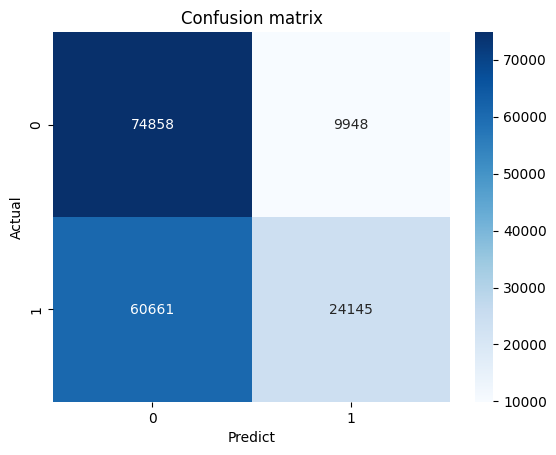

In [ ]:
confusion = confusion_matrix(y_val, logre_pred, labels = [0,1])
sns.heatmap(confusion, annot=True, cmap='Blues',fmt="d",
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

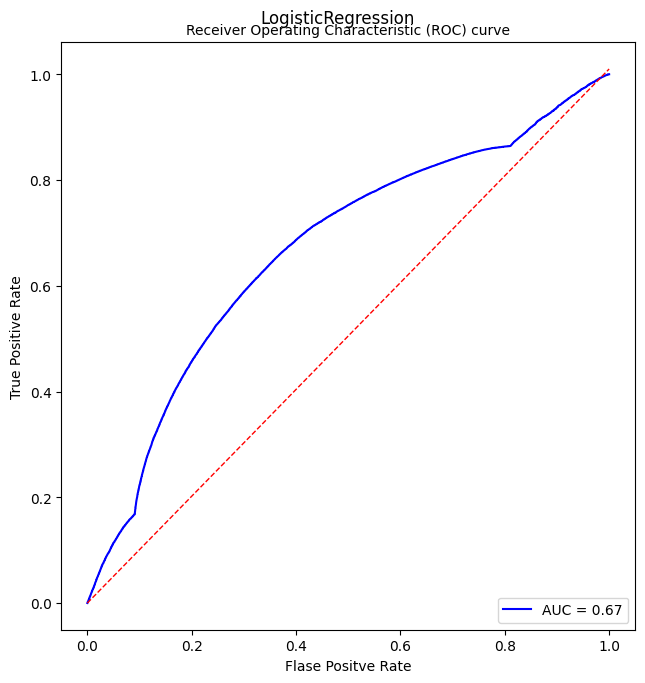

In [ ]:
auc_plot(logre_model,x_val,y_val)

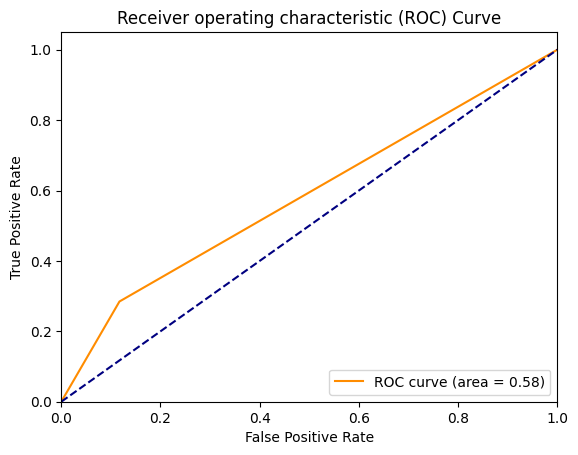

In [ ]:
# Calculate the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_val, logre_pred)

# Calculate the area under the curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Axes(0.125,0.11;0.775x0.77)


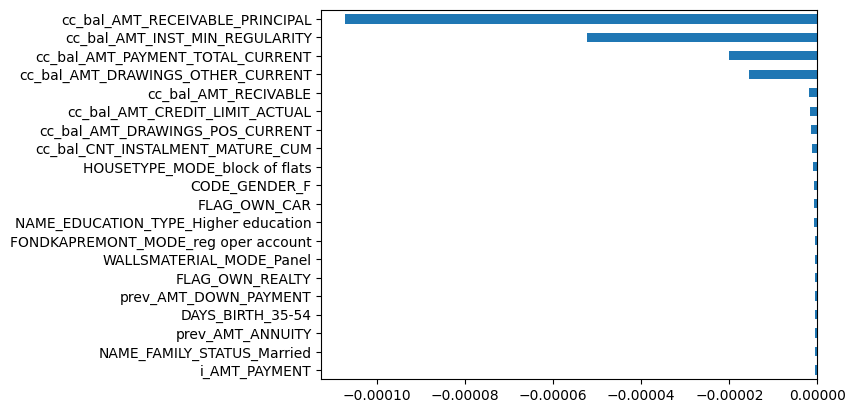

In [ ]:
# To get the weights of all the variables
weights = pd.Series(logre_model.coef_[0],
                 index=x_val.columns.values)
print (weights.sort_values(ascending = False)[-20:].plot(kind='barh'))

## SVM

In [ ]:
#model.svm = SVC(kernel='linear')
svc_model = SVC(probability=True)
svc_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
filename = 'svc_model_home_credit.pkl'
pickle.dump(svc_model, open(filename, 'wb'))

In [ ]:
svc_predict = svc_model.predict(x_val)
accuracy_svc = svc_model.score(x_val,y_val)
print("SVM accuracy is :",accuracy_svc)

In [ ]:
print(classification_report(y_val, svc_predict))

In [ ]:
confusion = confusion_matrix(y_val, svc_predict, labels = [0,1])
sns.heatmap(confusion, annot=True, cmap='Blues',fmt="d",
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, svc_predict)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## RF

In [ ]:
rf_model = RandomForestClassifier( oob_score = True, n_jobs = -1,
                                  max_features = "auto",
                                  max_leaf_nodes = 70)
rf_model.fit(x_train, y_train)

<ipython-input-92-7c0b0ca00119>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', max_leaf_nodes=70, n_jobs=-1,
                       oob_score=True)

In [ ]:
# Make predictions
rf_predict = rf_model.predict(x_val)
print(accuracy_score(y_val, rf_predict))

0.8131382213522628


In [ ]:
filename = 'rf_model_home_credit.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [ ]:
print(classification_report(y_val, rf_predict))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82     84806
           1       0.86      0.75      0.80     84806

    accuracy                           0.81    169612
   macro avg       0.82      0.81      0.81    169612
weighted avg       0.82      0.81      0.81    169612



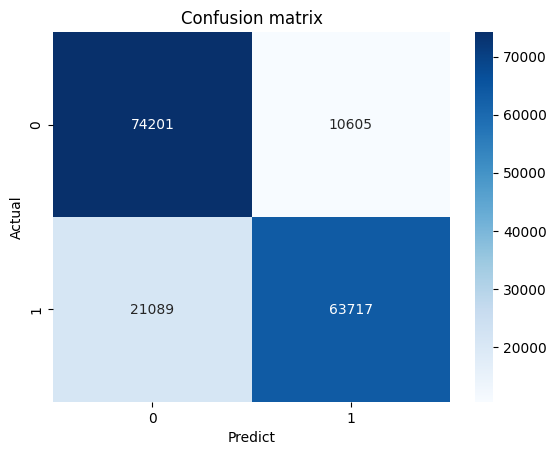

In [ ]:
confusion = confusion_matrix(y_val, rf_predict, labels = [0,1])
sns.heatmap(confusion, annot=True, cmap='Blues',fmt="d",
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

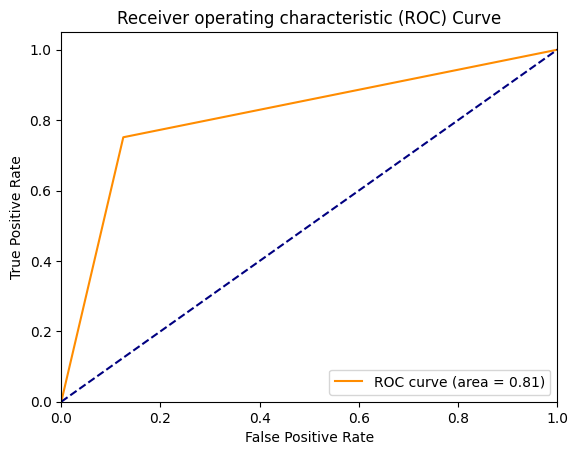

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, rf_predict)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<Axes: >

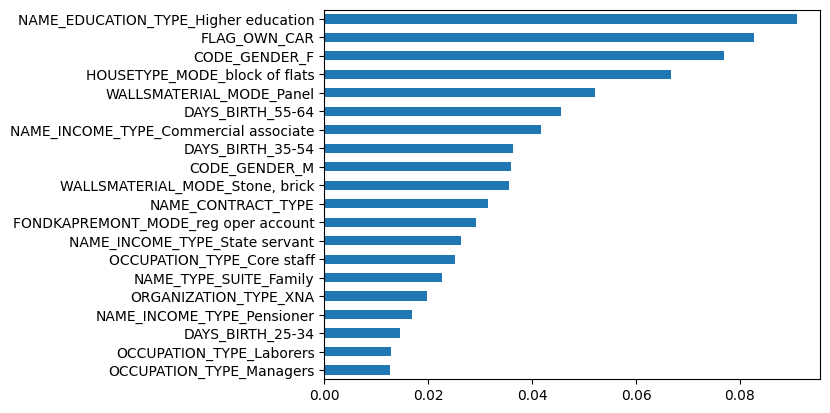

In [ ]:
importances = rf_model.feature_importances_
weights = pd.Series(importances,
                 index=x_val.columns.values)
weights.sort_values()[-20:].plot(kind = 'barh')

## XGBoost

In [ ]:
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train, y_train)
xgboost_predict = xgboost_model.predict(x_val)
accuracy_score(y_val, xgboost_predict)

0.9338136452609486

In [ ]:
testX['Predict Target'] = xgboost_model.predict(testX[cols])
testX['Predict Target']

307511    0
307512    0
307513    0
307514    0
307515    0
         ..
356250    0
356251    0
356252    0
356253    0
356254    0
Name: Predict Target, Length: 48744, dtype: int64

In [ ]:
testX['Predict Target'].value_counts()

0    48087
1      657
Name: Predict Target, dtype: int64

In [ ]:
import pickle
filename = 'xgboost_model_home_credit.pkl'
xgboost_model = pickle.load(open(filename, 'rb'))

In [ ]:
X_test_origin= pd.read_csv('/content/drive/MyDrive/Quản lý chung/HK6/Kiến tập/Kiến tập - Data/0. Kết quả/1. Dataset khách hàng đã phân loại/merge_test_applications_be4_scale.csv')

In [ ]:
X_test= pd.read_csv('/content/drive/MyDrive/Quản lý chung/HK6/Kiến tập/Kiến tập - Data/0. Kết quả/1  Dataset khách hàng đã phân loại/result_predict_on_test_dataset.csv')
X_test['xgboost_probabilities'] = xgboost_model.predict_proba(X_test[cols])[:, 1]  # Get predicted probabilities
X_test['xgboost_probabilities']


0        0.116037
1        0.097115
2        0.208521
3        0.065698
4        0.293000
           ...   
48739    0.083188
48740    0.072638
48741    0.006728
48742    0.003904
48743    0.079169
Name: xgboost_probabilities, Length: 48744, dtype: float32

In [ ]:
X_test= pd.read_csv('/content/drive/MyDrive/Quản lý chung/HK6/Kiến tập/Kiến tập - Data/0. Kết quả/1. Dataset khách hàng đã phân loại/result_predict_on_test_dataset.csv')
xgboost_probabilities = xgboost_model.predict_proba(X_test[cols])  # Get predicted probabilities
xgboost_probabilities

array([[0.88396347, 0.11603651],
       [0.90288544, 0.09711456],
       [0.7914791 , 0.20852086],
       ...,
       [0.99327177, 0.00672821],
       [0.9960956 , 0.00390439],
       [0.9208309 , 0.0791691 ]], dtype=float32)

In [ ]:
xgboost_predictions = xgboost_model.predict(X_test[cols])  # Get predicted labels
xgboost_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test

,Unnamed: 0.1,Unnamed: 0,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,prev_AMT_ANNUITY,prev_AMT_APPLICATION,prev_AMT_CREDIT,...,NAME_HOUSING_TYPE_With parents,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,Predict Target,xgboost_probabilities
0,0,307511,0,0,1,-0.643899,-0.035052,-1.424552,-1.424243,-1.528959,...,0,0,0,0,0,0,1,0,0,0.116037
1,1,307512,0,0,1,-0.643899,-0.035052,-1.247517,-1.495801,-1.636370,...,0,0,0,0,0,0,0,0,0,0.097115
2,2,307513,0,1,1,-0.643899,-0.035052,-0.222299,0.083309,0.096132,...,0,0,0,0,0,0,0,0,0,0.208521
3,3,307514,0,0,1,1.837792,1.799110,-0.688847,-0.902848,-0.405322,...,0,0,0,0,0,1,0,0,0,0.065698
4,4,307515,0,1,0,1.325821,0.986140,0.489435,1.038336,1.068731,...,0,0,0,0,0,0,0,0,0,0.293000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,48739,356250,0,0,1,-0.643899,-1.490827,0.106818,0.784982,0.824365,...,0,0,0,0,0,0,0,0,0,0.083188
48740,48740,356251,0,0,0,1.837792,1.799110,-0.864608,-0.369219,-0.342740,...,0,0,0,0,0,0,0,0,0,0.072638
48741,48741,356252,0,1,1,1.325821,0.986140,0.104386,0.173000,-0.018696,...,0,0,0,0,0,0,1,0,0,0.006728
48742,48742,356253,0,0,0,-0.643899,-0.035052,-0.221283,-0.078449,-0.062280,...,0,0,0,0,0,1,0,0,0,0.003904


In [ ]:
X_test_origin['Predict Target'] = xgboost_predictions

In [ ]:
X_test_origin

,Unnamed: 0,SK_ID_CURR,is_test,is_train,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,...,cc_bal_AMT_RECIVABLE,cc_bal_AMT_TOTAL_RECEIVABLE,cc_bal_CNT_DRAWINGS_ATM_CURRENT,cc_bal_CNT_DRAWINGS_CURRENT,cc_bal_CNT_DRAWINGS_OTHER_CURRENT,cc_bal_CNT_DRAWINGS_POS_CURRENT,cc_bal_CNT_INSTALMENT_MATURE_CUM,cc_bal_SK_DPD,cc_bal_SK_DPD_DEF,Predict Target
0,307511,100001,1,0,Cash loans,F,N,Y,0,>100k,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,307512,100005,1,0,Cash loans,M,N,Y,0,50k-100k,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,307513,100013,1,0,Cash loans,M,Y,Y,0,>100k,...,18101.079844,18101.079844,0.255556,0.239583,0.0,0.000000,18.719101,0.010417,0.010417,0
3,307514,100028,1,0,Cash loans,F,N,Y,2,>100k,...,7968.609184,7968.609184,0.045455,2.387755,0.0,2.613636,19.547619,0.000000,0.000000,0
4,307515,100038,1,0,Cash loans,M,Y,N,1,>100k,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,356250,456221,1,0,Cash loans,F,N,Y,0,>100k,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
48740,356251,456222,1,0,Cash loans,F,N,N,2,>100k,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
48741,356252,456223,1,0,Cash loans,F,Y,Y,1,>100k,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
48742,356253,456224,1,0,Cash loans,M,N,N,0,>100k,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
X_test_origin.to_csv('merge_test_applications_be4_scale.csv')

In [ ]:
testX= X_test.copy()
testX.to_csv('result_predict_on_test_dataset.csv')

In [ ]:
X_test_origin[X_test_origin['Predict Target']==1].to_csv('UnSafe_customers_be4_scale_home_credit.csv')
X_test_origin[X_test_origin['Predict Target']==0].to_csv('Safe_customers_be4_scale_home_credit.csv')

In [ ]:
testX[testX['Predict Target']==1].to_csv('Safe_customers_home_credit.csv')

In [ ]:
testX[testX['Predict Target']==0].to_csv('UnSafe_customers_home_credit.csv')

In [ ]:
filename = 'xgboost_model_home_credit.pkl'
pickle.dump(xgboost_model, open(filename, 'wb'))

In [ ]:
print(classification_report(y_val, xgboost_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     84806
           1       0.96      0.90      0.93     84806

    accuracy                           0.93    169612
   macro avg       0.94      0.93      0.93    169612
weighted avg       0.94      0.93      0.93    169612



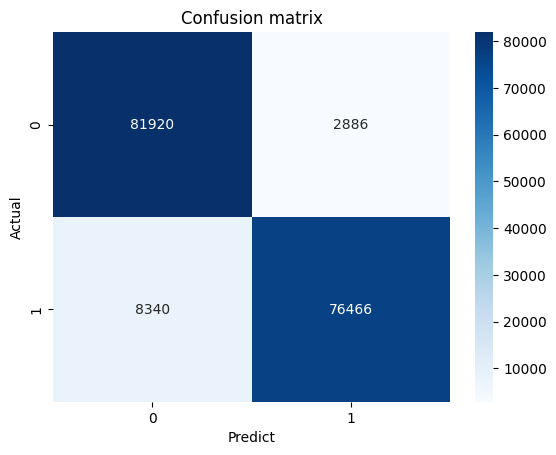

In [ ]:
confusion = confusion_matrix(y_val, xgboost_predict, labels = [0,1])
sns.heatmap(confusion, annot=True, cmap='Blues',fmt="d",
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

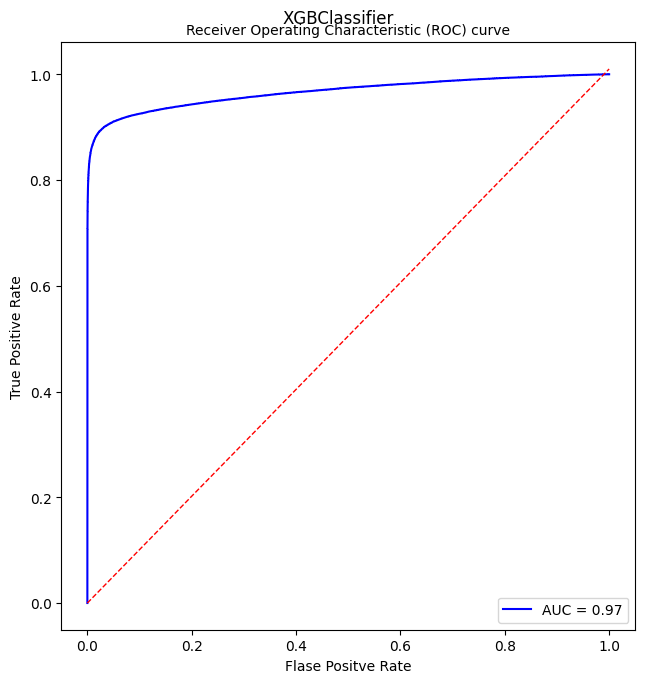

In [ ]:
auc_plot(xgboost_model,x_val,y_val)

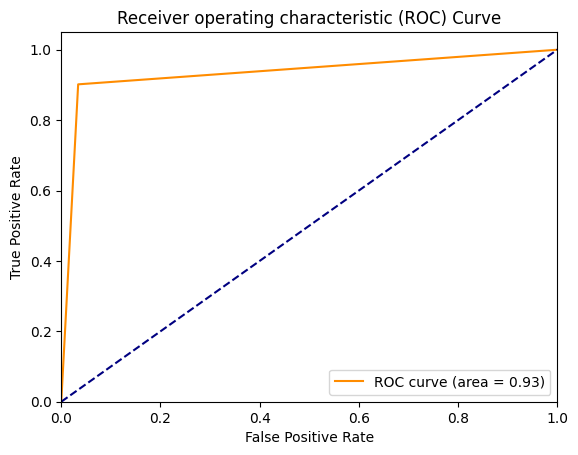

In [ ]:
# Calculate the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_val, xgboost_predict)

# Calculate the area under the curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<Figure size 3000x800 with 0 Axes>

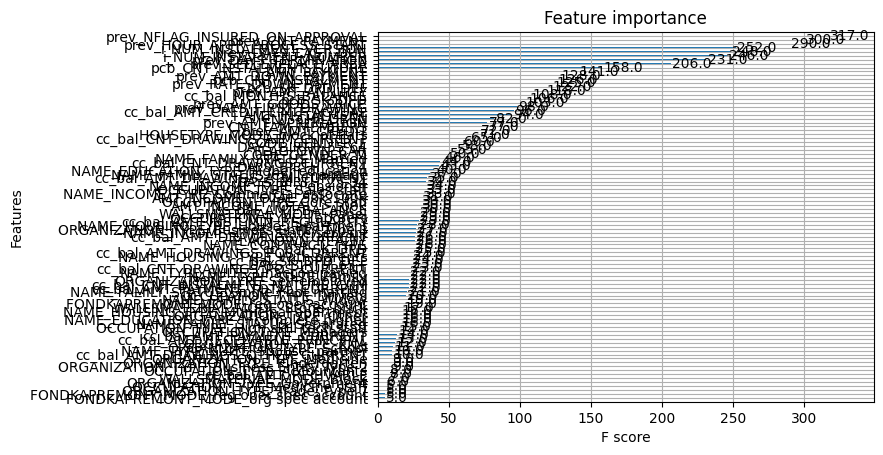

In [ ]:
importance_scores = xgboost_model.get_booster().get_score(importance_type='weight')

# Sort the features based on their importance in descending order
sorted_features = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)

# Print the sorted features and their importance scores
for feature, score in sorted_features:
    print(f"Feature: {feature}, Importance Score: {score}")

Feature: prev_NFLAG_INSURED_ON_APPROVAL, Importance Score: 317.0
Feature: prev_CNT_PAYMENT, Importance Score: 300.0
Feature: prev_HOUR_APPR_PROCESS_START, Importance Score: 290.0
Feature: i_NUM_INSTALMENT_VERSION, Importance Score: 252.0
Feature: prev_DAYS_LAST_DUE, Importance Score: 248.0
Feature: i_NUM_INSTALMENT_NUMBER, Importance Score: 246.0
Feature: prev_DAYS_TERMINATION, Importance Score: 231.0
Feature: prev_SELLERPLACE_AREA, Importance Score: 206.0
Feature: pcb_CNT_INSTALMENT_FUTURE, Importance Score: 158.0
Feature: i_AMT_PAYMENT, Importance Score: 141.0
Feature: prev_AMT_DOWN_PAYMENT, Importance Score: 128.0
Feature: pcb_CNT_INSTALMENT, Importance Score: 126.0
Feature: prev_RATE_DOWN_PAYMENT, Importance Score: 125.0
Feature: pcb_SK_DPD_DEF, Importance Score: 122.0
Feature: prev_AMT_ANNUITY, Importance Score: 118.0
Feature: cc_bal_MONTHS_BALANCE, Importance Score: 108.0
Feature: pcb_SK_DPD, Importance Score: 106.0
Feature: prev_AMT_GOODS_PRICE, Importance Score: 103.0
Feature: 

                                 Feature  Importance
86       NAME_TYPE_SUITE_Spouse, partner    0.071156
46                         CODE_GENDER_M    0.043207
61  NAME_EDUCATION_TYPE_Higher education    0.033861
53          NAME_FAMILY_STATUS_Separated    0.031839
91              WALLSMATERIAL_MODE_Block    0.031821
..                                   ...         ...
34            cc_bal_AMT_PAYMENT_CURRENT    0.000411
20                      i_AMT_INSTALMENT    0.000406
42      cc_bal_CNT_INSTALMENT_MATURE_CUM    0.000375
31     cc_bal_AMT_DRAWINGS_OTHER_CURRENT    0.000317
38           cc_bal_AMT_TOTAL_RECEIVABLE    0.000000

[94 rows x 2 columns]


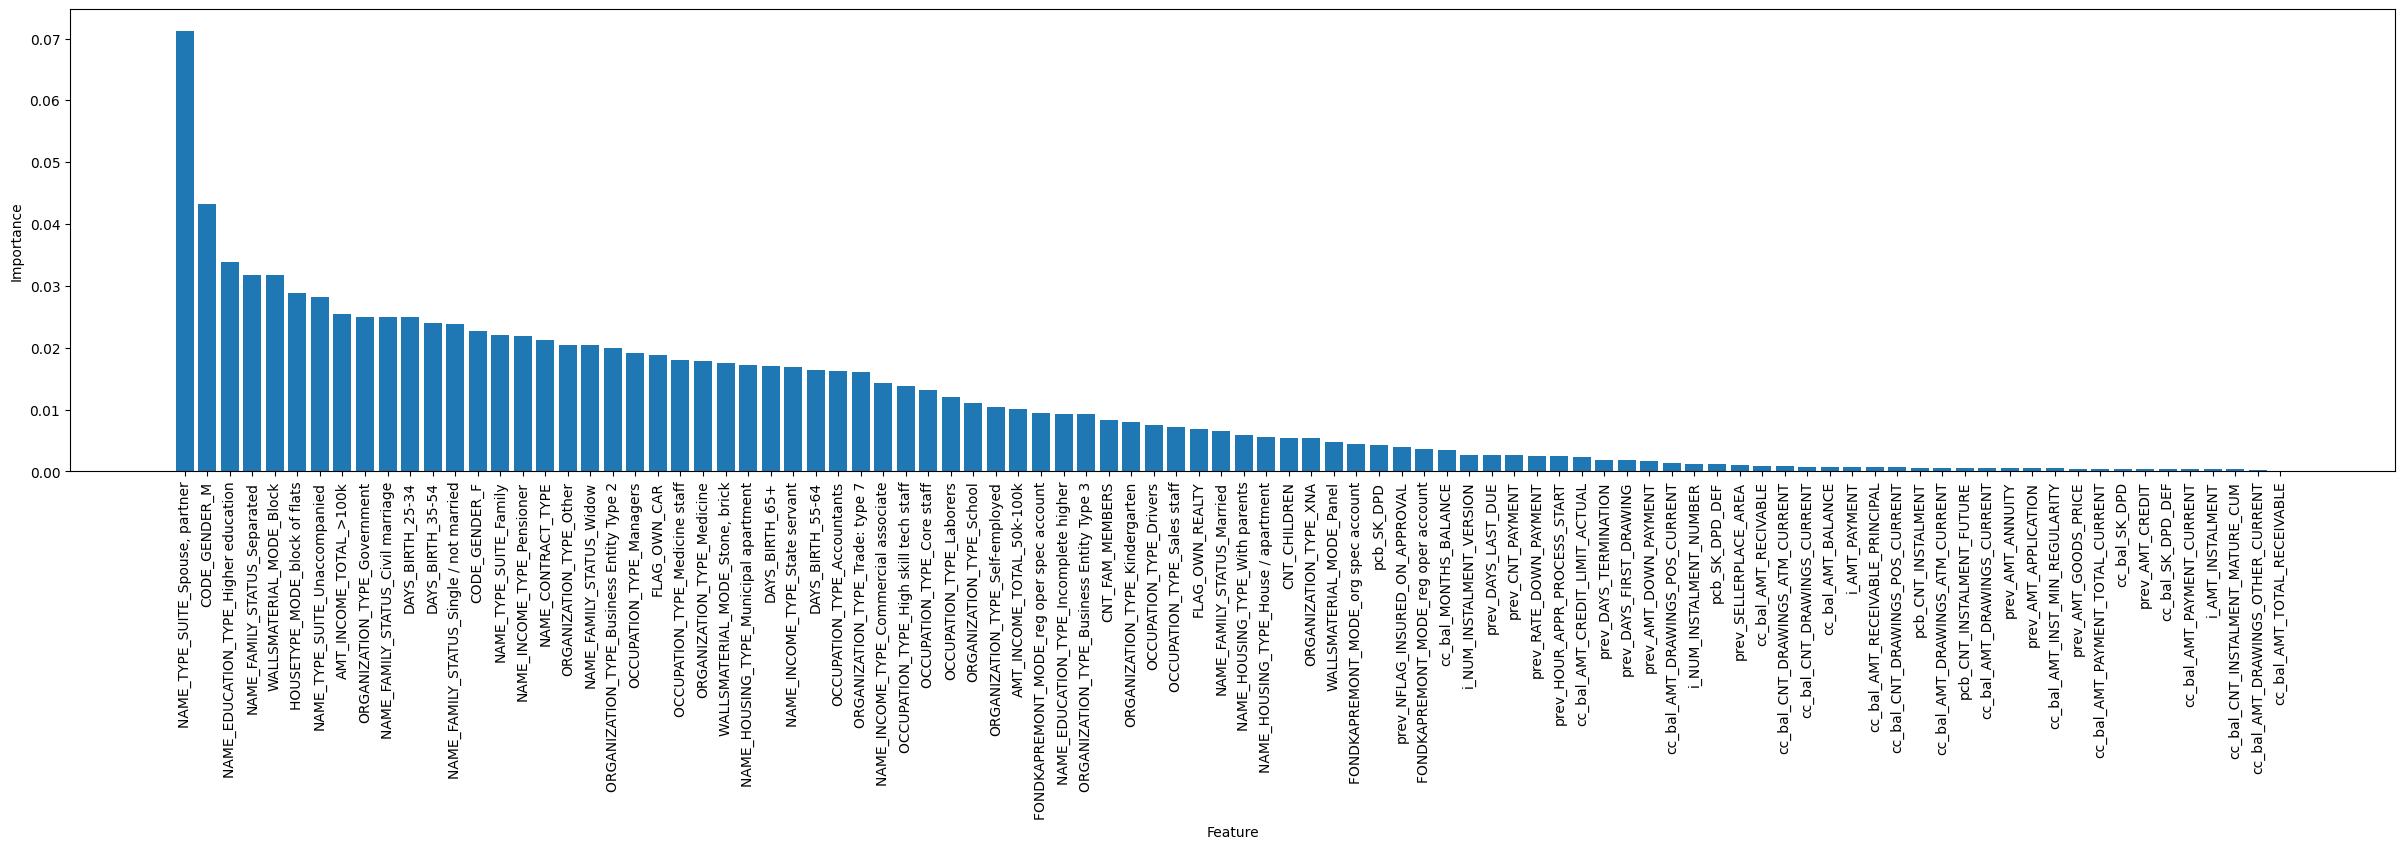

In [ ]:
# Get the feature importances
importance = xgboost_model.feature_importances_

# Create a dataframe of feature importances
importance_df = pd.DataFrame({'Feature': cols, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted dataframe
print(importance_df)
plt.figure(figsize=(30, 6))
# Plot the feature importances
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [ ]:
top_15_variables = importance_df['Feature'].tolist()
top_15_variables

['NAME_TYPE_SUITE_Spouse, partner',
 'CODE_GENDER_M',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_FAMILY_STATUS_Separated',
 'WALLSMATERIAL_MODE_Block',
 'HOUSETYPE_MODE_block of flats',
 'NAME_TYPE_SUITE_Unaccompanied',
 'AMT_INCOME_TOTAL_>100k',
 'ORGANIZATION_TYPE_Government',
 'NAME_FAMILY_STATUS_Civil marriage',
 'DAYS_BIRTH_25-34',
 'DAYS_BIRTH_35-54',
 'NAME_FAMILY_STATUS_Single / not married',
 'CODE_GENDER_F',
 'NAME_TYPE_SUITE_Family',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE_Other',
 'NAME_FAMILY_STATUS_Widow',
 'ORGANIZATION_TYPE_Business Entity Type 2',
 'OCCUPATION_TYPE_Managers',
 'FLAG_OWN_CAR',
 'OCCUPATION_TYPE_Medicine staff',
 'ORGANIZATION_TYPE_Medicine',
 'WALLSMATERIAL_MODE_Stone, brick',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'DAYS_BIRTH_65+',
 'NAME_INCOME_TYPE_State servant',
 'DAYS_BIRTH_55-64',
 'OCCUPATION_TYPE_Accountants',
 'ORGANIZATION_TYPE_Trade: type 7',
 'NAME_INCOME_TYPE_Commercial associate',
 'OCCUPATION_TY

### Corre

In [ ]:
variables = ['prev_NFLAG_INSURED_ON_APPROVAL', 'prev_HOUR_APPR_PROCESS_START', 'prev_CNT_PAYMENT', 'i_NUM_INSTALMENT_VERSION', 'i_NUM_INSTALMENT_NUMBER', 'prev_DAYS_LAST_DUE', 'prev_DAYS_TERMINATION', 'prev_SELLERPLACE_AREA', 'pcb_CNT_INSTALMENT_FUTURE', 'prev_AMT_ANNUITY']

In [ ]:
test_applications_be4_scale = pd.read_csv('/content/drive/MyDrive/Quản lý chung/HK6/Kiến tập/Kiến tập - Data/0. Kết quả/1. Dataset khách hàng đã phân loại/merge_test_applications_be4_scale.csv')

In [ ]:
from xgboost import plot_importance
plot_importance(xgboost_model)

## LightGBM

In [ ]:
params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc',
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 0 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1,
          'min_split_gain':.01, 'min_child_weight':1}
model = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)

In [ ]:
lgb.plot_importance(model, figsize=(12, 25), max_num_features=100);

In [ ]:
preds = model.predict(testX)
sub_lgb = pd.DataFrame()
sub_lgb['SK_ID_CURR'] = test_id
sub_lgb['TARGET'] = preds
sub_lgb.to_csv("lgb_baseline.csv", index=False)
sub_lgb.head()

In [ ]:
sub_lgb